In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import healpy as hp
import matplotlib.pylab as plt

In [2]:
survey_length = 3.5 # days
# Define what we want the final visit ratio map to look like
target_map = fs.standard_goals()['y']
bfs = []
# Target number of observations
bfs.append(fs.Target_map_basis_function(filtername='y', target_map=target_map))
# Mask everything but the South
bfs.append(fs.Quadrant_basis_function(quadrants=['S'], azWidth=30., maxAlt=82.))
# throw in the depth percentile for good measure
bfs.append(fs.Depth_percentile_basis_function())

weights = np.array([1., 1., 1.])

#survey = fs.Marching_army_survey(bfs, weights, npick=40)
# Try out pairs!
survey = fs.Marching_army_survey_pairs(bfs, weights, npick=40)
scheduler = fs.Core_scheduler([survey])

In [3]:
observatory = Speed_observatory()#mjd_start=59713.2497538825)
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='y_marching_south.db')

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


progress = 114.6%Completed 2782 observations


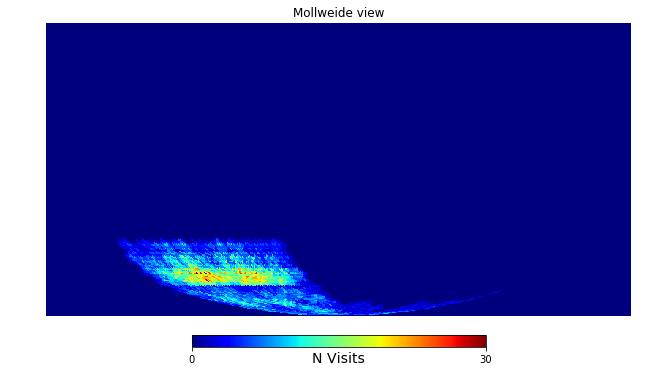

In [4]:
hp.mollview(scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature, cmap='jet', unit='N Visits')

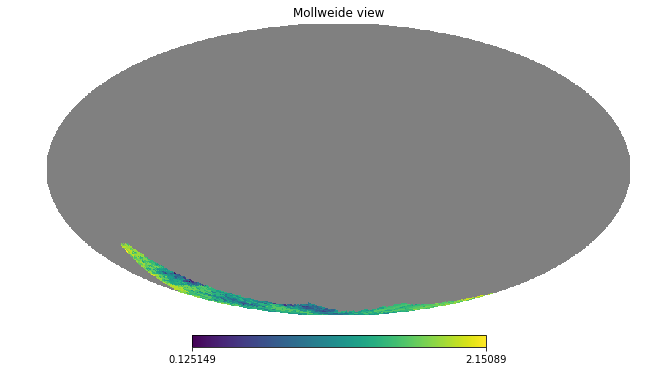

In [5]:
hp.mollview(scheduler.surveys[0].reward)

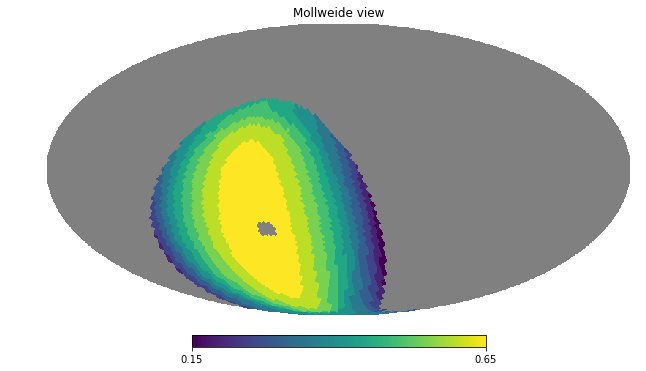

In [6]:
hp.mollview(scheduler.surveys[0].basis_functions[2]() )

In [7]:
scheduler.surveys[0].basis_functions

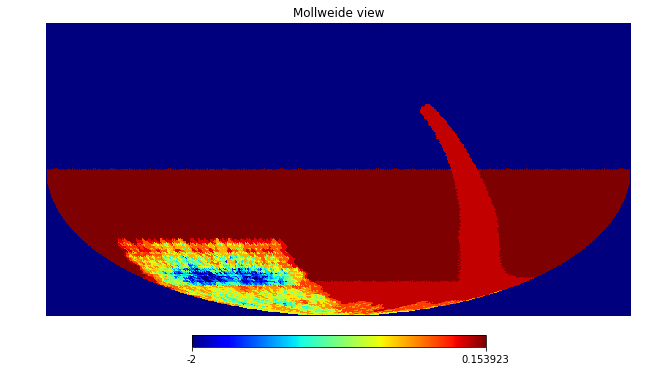

In [8]:
hp.mollview(scheduler.surveys[0].basis_functions[0](), cmap='jet', min=-2)

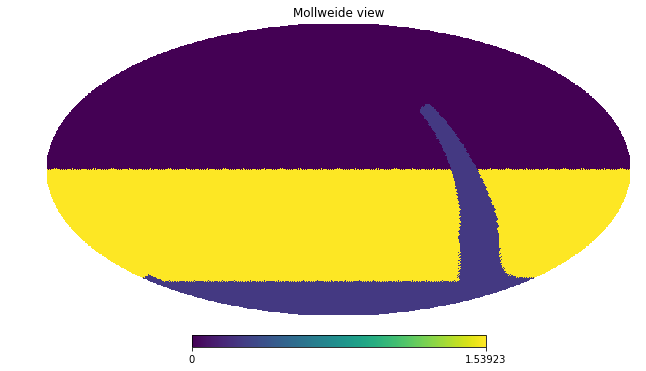

In [9]:
region = np.where(target_map > 0)
n_obs_goal = np.sum(target_map[region])
n_pix_obs = np.sum(scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature[region])
n_obs_goal, n_pix_obs
#hp.mollview(target_map-scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature/n_pix_obs * n_obs_goal)
hp.mollview(target_map*n_pix_obs/n_obs_goal)
#np.unique(target_map*n_pix_obs/n_obs_goal)
#hp.mollview((target_map*n_pix_obs/n_obs_goal-scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature)/10.)

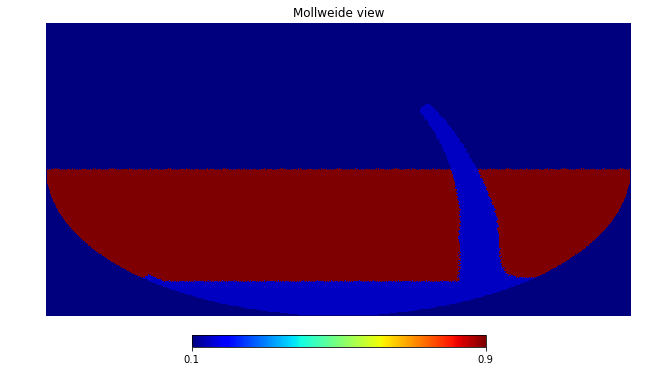

In [10]:
hp.mollview(target_map, min=0.1, cmap='jet')

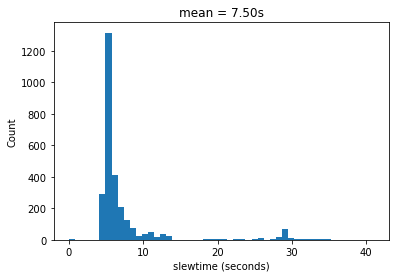

In [11]:
none = plt.hist(observations['slewtime'], bins=50)
plt.xlabel('slewtime (seconds)')
plt.ylabel('Count')
plt.title('mean = %.2fs' % np.mean(observations['slewtime']))

In [12]:
np.mean(observations['slewtime']), np.median(observations['slewtime'])

(7.5011961995805105, 5.5466482457803465)

In [13]:
observations['slewtime'][0:80]

array([  0.        ,   4.75638973,   5.38485612,   5.61112827,
         5.41562284,   5.38774258,   5.36690368,   5.94929746,
         5.83531663,   5.37446577,   5.39043433,   5.4114748 ,
         5.16128952,   5.42678896,   5.40035065,   5.38294901,
         5.3705482 ,   5.3677626 ,   8.11627672,   6.34586573,
         5.35532599,   5.37655577,   5.403004  ,   4.75303327,
         5.40586169,   5.37009825,   5.5464637 ,   7.37262143,
        11.78577542,   4.7772573 ,  10.34534074,   7.34889766,
         5.87997982,   5.35522373,   6.16540715,   5.90139876,
         7.19950307,   6.57091925,   5.87243176,   6.37743138,
        25.58818016,   5.33374618,   5.42154066,   5.02638279,
         5.42891242,   5.40492542,   5.38989814,  12.66229262,
         7.83495209,   5.5712775 ,   5.37149635,   5.39610385,
         4.78469415,   5.39644522,   5.35534622,   6.04627887,
         8.12084733,  12.87312481,   4.82120765,  10.7378849 ,
         7.78414735,   6.23439891,   5.355377  ,   4.81

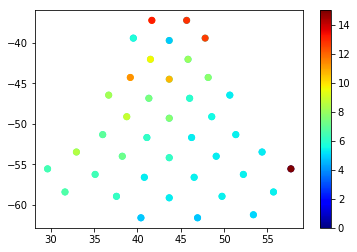

In [14]:
i1 = 0
i2=80
plt.scatter(observations['RA'][i1:i2], observations['dec'][i1:i2], c=observations['slewtime'][i1:i2], cmap='jet', vmax=15)
plt.colorbar()

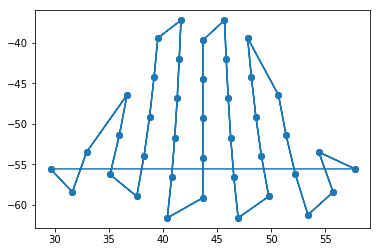

In [15]:
plt.plot(observations['RA'][i1:i2], observations['dec'][i1:i2], 'o-')


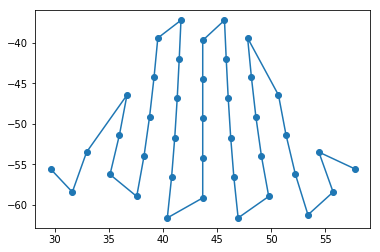

In [16]:
plt.plot(observations['RA'][0:40], observations['dec'][0:40], 'o-')